# Datos del Estudiante.

1. Nombre: Luis Felipe Narváez Gómez 
2. Código: 2312660
3. Universidad Santo Tomas seccional Tunja
4. Facultad: Ingeniería de Sistemas
5. Asignatura: Electiva I - Deep Learning
6. Periodo: 2021-2

# Regresion Logistica con SCIKIT-LEARN

## Ejercicio 1

Conociendo el dataset, el profesor "Freddy Michael Kruege Myres", no tiene claro que tiempo recomendarles a sus estudiantes para que estudien para el examen y con ello garantizar las mejores notas. Por lo tanto recolecta la base de datos con los útimos 2000 exámenes donde están las horas que estudiaron y si aprobó o no.

En la variante de este ejercicio se presenta el caso de horas de tutoria para cada celda.

La base de datos es la siguiente:

https://github.com/OnRuiso/Deep-Learning-/blob/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T7/horas_estudio_tutorias_vs_aprobacion.csv

o

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T7/horas_estudio_tutorias_vs_aprobacion.csv

### Importar Librerias

In [ ]:
# Importar Librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Importar DataBase

In [ ]:
# Importar base de datos desde Github

data = pd.DataFrame()
data = pd.read_csv("https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T7/horas_estudio_tutorias_vs_aprobacion.csv",encoding='utf-8')


Para conocer los datos del DataFrame, es posible utilizar las funciones propieas de "pandas", para ello se puede investigar el siguiente link:

https://aprendeconalf.es/docencia/python/manual/pandas/

### Conocer Datos con Pandas

In [ ]:
#Atributos del DataFrame utilizando Pandas

In [ ]:
"""
df.info() : Devuelve información (número de filas, número de columnas, índices, tipo de las columnas y memoria usado) sobre el DataFrame df.
"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   horas_autoestudio_diario  1000 non-null   int64
 1   tutorias_mes              1000 non-null   int64
 2   aprobo_perdio             1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [ ]:
"""df.shape : Devuelve una tupla con el número de filas y columnas del DataFrame df."""
data.shape

(1000, 3)

In [ ]:
"""df.size : Devuelve el número de elementos del DataFrame."""
data.size

3000

In [ ]:
"""df.columns : Devuelve una lista con los nombres de las columnas del DataFrame df."""
data.columns

Index(['horas_autoestudio_diario', 'tutorias_mes', 'aprobo_perdio'], dtype='object')

In [ ]:
"""df.index : Devuelve una lista con los nombres de las filas del DataFrame df."""
data.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
"""df.dtypes : Devuelve una serie con los tipos de datos de las columnas del DataFrame df."""
data.dtypes

horas_autoestudio_diario    int64
tutorias_mes                int64
aprobo_perdio               int64
dtype: object

In [ ]:
"""df.head(n) : Devuelve las n primeras filas del DataFrame df."""
data.head(3)

,horas_autoestudio_diario,tutorias_mes,aprobo_perdio
0,7,27,1
1,2,43,0
2,7,26,1


In [ ]:
"""df.tail(n) : Devuelve las n últimas filas del DataFrame df."""
data.tail(3)

,horas_autoestudio_diario,tutorias_mes,aprobo_perdio
997,3,39,0
998,7,25,1
999,5,37,0


In [ ]:
"""print(df.keys()) : Imprime los keys o titulos de las columnas, funciona como columns"""
print(data.keys())

Index(['horas_autoestudio_diario', 'tutorias_mes', 'aprobo_perdio'], dtype='object')


In [ ]:
"""df.isnull().sum() = nos dice si hay datos nulos y va sumando cuantos encuentra en cada columna"""
data.isnull().sum()

horas_autoestudio_diario    0
tutorias_mes                0
aprobo_perdio               0
dtype: int64

In [ ]:
"""df.count() : Devuelve una serie número de elementos que no son nulos ni NaN en cada columna del DataFrame df."""
data.count()

horas_autoestudio_diario    1000
tutorias_mes                1000
aprobo_perdio               1000
dtype: int64

In [ ]:
"""df.sum() : Devuelve una serie con la suma de los datos de las columnas del 
DataFrame df cuando los datos son de un tipo numérico, o la concatenación de 
ellos cuando son del tipo cadena str."""
data.sum()

horas_autoestudio_diario     5744
tutorias_mes                31230
aprobo_perdio                 499
dtype: int64

In [ ]:
"""df.cumsum() : Devuelve un DataFrame con la suma acumulada de los datos de las
 columnas del DataFrame df cuando los datos son de un tipo numérico."""
 #data.cumsum()

'df.cumsum() : Devuelve un DataFrame con la suma acumulada de los datos de las\n columnas del DataFrame df cuando los datos son de un tipo numérico.'

In [ ]:
"""df.min() : Devuelve una serie con los menores de los datos de las columnas del DataFrame df."""
data.min()

horas_autoestudio_diario     0
tutorias_mes                20
aprobo_perdio                0
dtype: int64

In [ ]:
"""df.max() : Devuelve una serie con los mayores de los datos de las columnas del DataFrame df."""
data.max()

horas_autoestudio_diario    10
tutorias_mes                50
aprobo_perdio                1
dtype: int64

In [ ]:
"""df.mean() : Devuelve una serie con las media de los datos de las columnas del DataFrame df cuando los datos son de un tipo numérico."""
data.mean()

horas_autoestudio_diario     5.744
tutorias_mes                31.230
aprobo_perdio                0.499
dtype: float64

In [ ]:
"""df.std() : Devuelve una serie con las desviaciones típicas de los datos de las columnas 
del DataFrame df cuando los datos son de un tipo numérico."""
data.std()

horas_autoestudio_diario    2.121076
tutorias_mes                5.976355
aprobo_perdio               0.500249
dtype: float64

In [ ]:
"""df.describe(include = tipo) : Devuelve un DataFrame con un resumen estadístico de las columnas del 
DataFrame df del tipo tipo. Para los datos numéricos (number) se calcula la media, la desviación típica, 
el mínimo, el máximo y los cuartiles de las columnas numéricas. Para los datos no numéricos (object) 
se calcula el número de valores, el número de valores distintos, la moda y su frecuencia. Si no se indica 
el tipo solo se consideran las columnas numéricas."""
data.describe(include = int)

,horas_autoestudio_diario,tutorias_mes,aprobo_perdio
count,1000.000000,1000.000000,1000.000000
mean,5.744000,31.230000,0.499000
std,2.121076,5.976355,0.500249
min,0.000000,20.000000,0.000000
25%,4.000000,26.000000,0.000000
50%,6.000000,30.000000,0.000000
75%,7.000000,36.000000,1.000000
max,10.000000,50.000000,1.000000


In [ ]:
"""s.describe(): Devuelve una serie con un resumen descriptivo que incluye el 
número de datos, su suma, el mínimo, el máximo, la media, la desviación típica y los cuartiles."""
data.describe()

,horas_autoestudio_diario,tutorias_mes,aprobo_perdio
count,1000.000000,1000.000000,1000.000000
mean,5.744000,31.230000,0.499000
std,2.121076,5.976355,0.500249
min,0.000000,20.000000,0.000000
25%,4.000000,26.000000,0.000000
50%,6.000000,30.000000,0.000000
75%,7.000000,36.000000,1.000000
max,10.000000,50.000000,1.000000


In [ ]:
"""s.value_counts() : Devuelve una serie con la frecuencia (número de repeticiones) de cada valor de la serie s."""
data.value_counts()

horas_autoestudio_diario  tutorias_mes  aprobo_perdio
7                         26            1                83
8                         28            1                61
7                         25            1                61
8                         27            1                54
                          29            1                53
                                                         ..
4                         27            0                 1
3                         45            0                 1
                          29            0                 1
                          26            0                 1
0                         33            0                 1
Length: 135, dtype: int64

### Graficar la Data Base

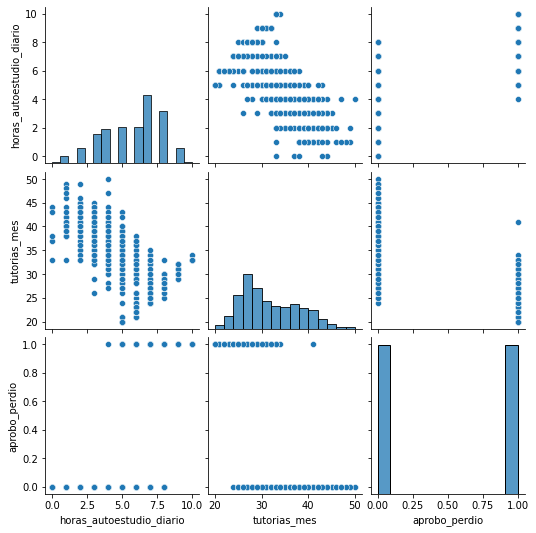

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

'tight_layout ajusta automáticamente los parámetros de la subtrama para que las subtramas se ajusten al área de la figura.'

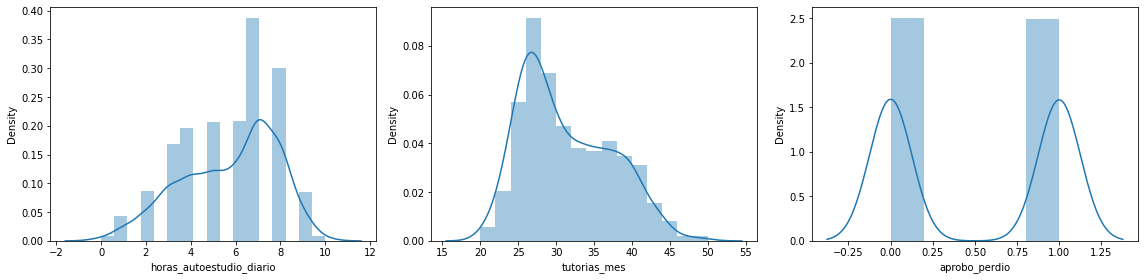

In [ ]:
cols = 3 #Numero de columnas para la grafica
fig, ax = plt.subplots(ncols=cols, figsize=(16,4)) #figura,auxiliar = varias_graficas(numero_de_columnas , tamaño de figuras)

col = data.columns #Las columnas contendran la informacion de data.columns
index = 0 #valor de indice para la columna

#de i hasta el numero de cols, imprime por pantalla una imagen sns de densidad de datos correspondiente a la columna especificada, esto se genera en la cuadricula
#de la cuadricula generada correspondiente a los subplots.Sigue con la siguiente columna y asi hasta llegar al numero de cols
for i in range(cols):
  sns.distplot(data[col[index]], ax=ax[i])
  index += 1

plt.tight_layout()
"""tight_layout ajusta automáticamente los parámetros de la subtrama para que las subtramas se ajusten al área de la figura."""

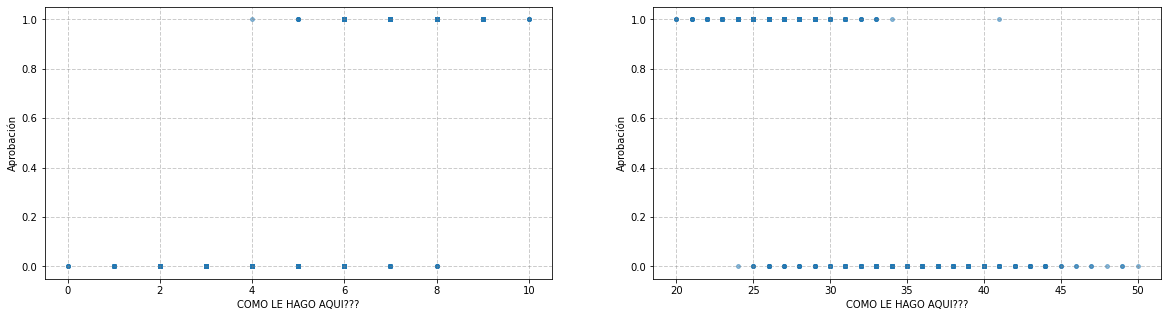

In [ ]:
col = data.columns
index = 0
plt.figure(figsize=(20,5))

for i in range(1,3):
  plt.subplot(1, 2, i)
  X = data[col[index]]
  y = data['aprobo_perdio']
  plt.scatter(X, y, s=15, alpha=0.5)
  plt.xlabel('COMO LE HAGO AQUI???')
  plt.ylabel('Aprobación')
  plt.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
  i += 1
  index += 1

Los datos de tutorias y horas de auto estudio son contrarias. Procedern a un analisis tal y como se explica en el codigo P1T6.

### Preparacion de la Data.

In [ ]:
X = data.drop('aprobo_perdio', axis=1)
y = data.aprobo_perdio
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.2)

### Entrenamiento de la Data

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediccion

In [ ]:
y_prediction = logistic_regression.predict(x_test)
print(y_prediction)

[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1
 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1]


### Probabilidad de acierto

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Exactitud= ' + str(100*accuracy) + "%")

Exactitud= 97.0%


### Pruebas con datos Mauales
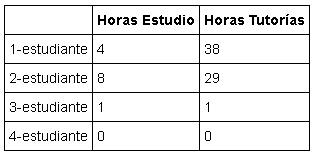


In [ ]:
students = np.array([[4,38],[8,29],[1,1],[0,0]])
x_new = pd.DataFrame(students, columns=['horas_autoestudio_diario', 'tutorias_mes'])
y_prediction = logistic_regression.predict(x_new)
print(y_prediction)

[0 1 1 1]


## Ejercicio 2

### Descripción

**Descripción del problema**

El conjunto de datos fue tomado del repositorio UCI Machine Learning, con algunos cambios realizados en el repositorio de Machine Learning, Luis Castellanos, y esta relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de clasificación es predecir si el cliente se subscribirá(1/0) a un depósito a plazo (variable y)

Las variables del dataset son las siguientes:

1. edad (numérica)
2. trabajo: tipo de trabajo (categórico: "admin.”, "housemaid", "management", "retired", "self-employed", "student", "technician", "unemployed", "unknown")
3. conyugal: estado civil (categórico: "divorciado", "casado", "único", "desconocido")
4. educación: (categórica: “preschool", “primary_school", “tecnical_school", " Technological_school", "illiterate", "professional.course", "university.degree", "unknown")
5. Total_hijos: número total de hijos
6. credito_sin_pago: ¿tiene crédito en incumplimiento de pago? (categóricamente: "no", "sí", "desconocido")
prestamo_vivienda: ¿tiene préstamo de vivienda? (categóricamente: "no", "sí", "desconocido")
7. prestamo_personal: ¿tiene préstamo personal? (categóricamente: "no", "sí", "desconocido")
8. valor_préstamo:(numérico) es el valor total del prestamos que tiene con el banco
9. tarjetas_credito: Número de tarjetas de crédito con otros bancos
10. contacto: tipo de comunicación de contacto (categórico: "celular", "teléfono")
11. mes: último mes de contacto del año (categórico: "jan", "feb", "mar", ..., "nov", "dec")
12. dia_semana: último día de contacto de la semana (categórico: "mon", "tue", "wed", "thu", "fri")
13. duracion_ultimo_contacto: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida al destino de salida (p. ej., si duration-0 y 'no').
14. campanna: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
15. dias_ultimo_contacto: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior
16. anterior_contacto: número de contactos realizados antes de esta campaña y para este cliente (numérico)
17. resultado_anterior: resultado de la campaña de marketing anterior (categórica: "fracaso", "inexistente", "éxito")
18. numero_empleados: número de empleados que tiene a su cargo — (numérico)
Predecir variable (objetivo deseado): (binario: "1", significa "Sí", "0" significa "No")

La base de datos es la siguiente:

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T7/mercadeo_bancario_original.csv

o 

https://github.com/OnRuiso/Deep-Learning-/blob/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T7/mercadeo_bancario_original.csv

### Importar Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Importar DataBase desde GitHub

In [ ]:
data = pd.DataFrame()
data = pd.read_csv("https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T7/mercadeo_bancario_original.csv", encoding='utf-8')


### Informacion Pandas

In [ ]:
# Informacion general de la database
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      41188 non-null  int64 
 1   trabajo                   41188 non-null  object
 2   estado_civil              41188 non-null  object
 3   educacion                 41188 non-null  object
 4   total_hijos               41188 non-null  int64 
 5   credito_sin_pago          41188 non-null  object
 6   prestamo_vivienda         41188 non-null  object
 7   prestamo_personal         41188 non-null  object
 8   valor_prestamo            41188 non-null  int64 
 9   dias_ultimo_pago          41188 non-null  int64 
 10  tarjetas_credito          41188 non-null  int64 
 11  contacto                  41188 non-null  object
 12  mes                       41188 non-null  object
 13  dia_semana                41188 non-null  object
 14  duracion_ultimo_contac

In [ ]:
# Numero de Filas y columnas
data.shape

(41188, 19)

In [ ]:
# Numero de elementos en el DataFrame
data.size

782572

In [ ]:
# Nombre de las columnas
data.columns

Index(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados', 'si_no'],
      dtype='object')

In [ ]:
# Nombre de las Filas
data.index

RangeIndex(start=0, stop=41188, step=1)

In [ ]:
# Tipos de datos de las columnas
data.dtypes

edad                         int64
trabajo                     object
estado_civil                object
educacion                   object
total_hijos                  int64
credito_sin_pago            object
prestamo_vivienda           object
prestamo_personal           object
valor_prestamo               int64
dias_ultimo_pago             int64
tarjetas_credito             int64
contacto                    object
mes                         object
dia_semana                  object
duracion_ultimo_contacto     int64
dias_ultimo_contacto         int64
anterior_contacto            int64
numero_empleados             int64
si_no                        int64
dtype: object

In [ ]:
# Primeros datos de la Database
data.head(3)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1


In [ ]:
# Ultimos datos de la Database
data.tail(3)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
41185,42,admin.,single,university.degree,1,yes,yes,yes,138636,89,3,telephone,may,wed,62,46,0,43,0
41186,48,technician,married,professional.course,4,yes,no,yes,138176,72,4,telephone,oct,tue,200,19,0,1068,0
41187,25,student,single,Technological_school,6,no,no,no,0,0,3,telephone,may,fri,112,0,0,1979,0


In [ ]:
# Cuantos datos nulos hay en cada fila
data.isnull().sum()

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

In [ ]:
# Total de elementos que NO son nulos o NaN por cada columna
data.count()

edad                        41188
trabajo                     41188
estado_civil                41188
educacion                   41188
total_hijos                 41188
credito_sin_pago            41188
prestamo_vivienda           41188
prestamo_personal           41188
valor_prestamo              41188
dias_ultimo_pago            41188
tarjetas_credito            41188
contacto                    41188
mes                         41188
dia_semana                  41188
duracion_ultimo_contacto    41188
dias_ultimo_contacto        41188
anterior_contacto           41188
numero_empleados            41188
si_no                       41188
dtype: int64

In [ ]:
# Menor de los datos NUMERICOS por columna
data.min()

edad                                          17
trabajo                                   admin.
estado_civil                            divorced
educacion                   Technological_school
total_hijos                                    0
credito_sin_pago                              no
prestamo_vivienda                             no
prestamo_personal                             no
valor_prestamo                                 0
dias_ultimo_pago                               0
tarjetas_credito                               0
contacto                                cellular
mes                                          apr
dia_semana                                   fri
duracion_ultimo_contacto                       0
dias_ultimo_contacto                           0
anterior_contacto                              0
numero_empleados                               0
si_no                                          0
dtype: object

In [ ]:
# Mayor de los datos NUMERICOS por columna
data.max()

edad                               98
trabajo                       unknown
estado_civil                  unknown
educacion                     unknown
total_hijos                         8
credito_sin_pago                  yes
prestamo_vivienda                 yes
prestamo_personal                 yes
valor_prestamo                 499992
dias_ultimo_pago                   90
tarjetas_credito                    5
contacto                    telephone
mes                               sep
dia_semana                        wed
duracion_ultimo_contacto         4918
dias_ultimo_contacto               90
anterior_contacto                   7
numero_empleados                 2000
si_no                               1
dtype: object

In [ ]:
# Media de los datos NUMERICOS por columna
data.mean()

edad                            40.024060
total_hijos                      3.984680
valor_prestamo              149706.676751
dias_ultimo_pago                 0.336409
tarjetas_credito                 2.497524
duracion_ultimo_contacto       258.285010
dias_ultimo_contacto            26.351170
anterior_contacto                0.172963
numero_empleados              1002.421652
si_no                            0.112654
dtype: float64

In [ ]:
# Debiacion tipica de los datos NUMERICOS por columna
data.std()

edad                            10.421250
total_hijos                      2.583405
valor_prestamo              166028.840792
dias_ultimo_pago                 4.478984
tarjetas_credito                 1.703683
duracion_ultimo_contacto       259.279249
dias_ultimo_contacto            29.942570
anterior_contacto                0.494901
numero_empleados               577.707188
si_no                            0.316173
dtype: float64

In [ ]:
# Resumen descriptivo de los datos 
data.describe()

,edad,total_hijos,valor_prestamo,dias_ultimo_pago,tarjetas_credito,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.984680,149706.676751,0.336409,2.497524,258.285010,26.35117,0.172963,1002.421652,0.112654
std,10.42125,2.583405,166028.840792,4.478984,1.703683,259.279249,29.94257,0.494901,577.707188,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.00000,2.000000,0.000000,0.000000,1.000000,102.000000,0.00000,0.000000,504.000000,0.000000
50%,38.00000,4.000000,81778.500000,0.000000,2.000000,180.000000,13.00000,0.000000,1001.000000,0.000000
75%,47.00000,6.000000,290938.500000,0.000000,4.000000,319.000000,52.00000,0.000000,1506.000000,0.000000
max,98.00000,8.000000,499992.000000,90.000000,5.000000,4918.000000,90.00000,7.000000,2000.000000,1.000000


In [ ]:
# Frecuencia con la que se repite un valor
data.value_counts()

edad  trabajo      estado_civil   educacion            total_hijos  credito_sin_pago  prestamo_vivienda  prestamo_personal  valor_prestamo  dias_ultimo_pago  tarjetas_credito  contacto   mes  dia_semana  duracion_ultimo_contacto  dias_ultimo_contacto  anterior_contacto  numero_empleados  si_no
98    retired      married        preschool            6            unknown           yes                no                 154192          0                 0                 cellular   oct  fri         476                       63                    2                  25                1        1
34    blue-collar  married        professional.course  3            no                no                 no                 0               0                 5                 cellular   apr  fri         365                       0                     0                  1735              0        1
                                  tecnical_school      1            unknown           yes                

### Convertir datos

Tal y como se Explico en el codigo P1T6:

  *"Existe un problema con esta base de datos y es que muchos de los mismos son valores de tipo string, con ellos no podemos calcular graficamente, ni tampoco entrenar la IA, pues esta ultima solo recibe datos numericos..."*

En este caso, veremos dos tipos de transformaciones de datos, uno realizado automaticamente y otro manuelmente, el cual utiliza las opciones de tratamiento de DataFrames de Pandas con los Diccionarios.



#### Conversion Manual

Este tipo de conversion es recomendada cuando existe un orden de los datos que no se corresponde a una asociacion humana comun. Un ejemplo de esto es el orden de los meses del año, mientras que para el mundo occidental preguntar por el mes "2" sera en una respuesta de "febrero", para una IA correspondera a la precencia que se haya tenido en la base de datos y el orden alfabetico de los datos, por lo que bien podria ser "Agosto".

Por tal motivo es que datos como estos se les asigna valores automaticamente.

In [ ]:
# por lo que podemos observar al ejecutar, el orden de los meses se da alfabeticamente, una guia no intuitiva naturalmente.
uniqueValues = data['mes'].unique()
print(sorted(uniqueValues))

['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']


In [ ]:
# Entonces, ¿Que valores tenemos?
data.columns

Index(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados', 'si_no'],
      dtype='object')

In [ ]:
#¿De estas columnas cuales contienen datos tipos object? en otras palabras ¿Que vamos a cambiar?
data.dtypes

edad                         int64
trabajo                     object
estado_civil                object
educacion                   object
total_hijos                  int64
credito_sin_pago            object
prestamo_vivienda           object
prestamo_personal           object
valor_prestamo               int64
dias_ultimo_pago             int64
tarjetas_credito             int64
contacto                    object
mes                         object
dia_semana                  object
duracion_ultimo_contacto     int64
dias_ultimo_contacto         int64
anterior_contacto            int64
numero_empleados             int64
si_no                        int64
dtype: object

Debemos cambiar entonces:

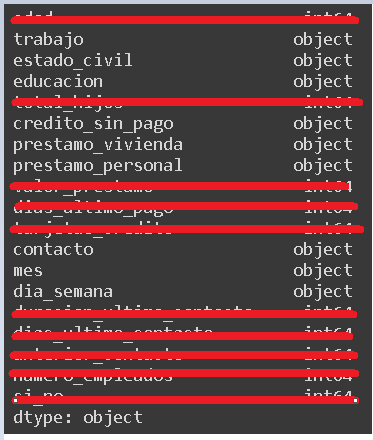

In [ ]:
uniqueValues = data['mes'].unique()
print(sorted(uniqueValues))

['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']


In [ ]:
mes = {
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}
data['mes'] = data['mes'].map(mes)

In [ ]:
uniqueValues = data['mes'].unique()
print(sorted(uniqueValues))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [ ]:
uniqueValues = data['dia_semana'].unique()
print(sorted(uniqueValues))

['fri', 'mon', 'thu', 'tue', 'wed']


In [ ]:
dia_semana = {
    'sun': 1,
    'mon': 2,
    'tue': 3,
    'wed': 4,
    'thu': 5,
    'fri': 6,
    'sat': 7
}
data['dia_semana'] = data['dia_semana'].map(dia_semana)

In [ ]:
uniqueValues = data['dia_semana'].unique()
print(sorted(uniqueValues))

[2, 3, 4, 5, 6]


#### Conversion Categorica en Data Numerica V2 (usando preprocessing)

In [ ]:
from sklearn import preprocessing
le =preprocessing.LabelEncoder()  #instanciamos el Codificador

In [ ]:
"""
le.fit(data['mes'])  #codificamos las categorias
list(le.classes_)
le.transform(data['mes'])   #transformamos las categorias a valores numericos
"""
# los datos de la columna n se reescribiran con la decodificacion-->transformacion de los datos de la misma columna
data['trabajo'] = le.fit_transform(data['trabajo'])
data['estado_civil '] = le.fit_transform(data['estado_civil '])
data['educacion'] = le.fit_transform(data['educacion'])
data['credito_sin_pago'] = le.fit_transform(data['credito_sin_pago'])
data['prestamo_vivienda'] = le.fit_transform(data['prestamo_vivienda'])
data['prestamo_personal'] = le.fit_transform(data['prestamo_personal'])
data['contacto'] = le.fit_transform(data['contacto'])

Comprobemos que los datoa ahora son numericos para cada columna

In [ ]:
data.dtypes

edad                        int64
trabajo                     int64
estado_civil                int64
educacion                   int64
total_hijos                 int64
credito_sin_pago            int64
prestamo_vivienda           int64
prestamo_personal           int64
valor_prestamo              int64
dias_ultimo_pago            int64
tarjetas_credito            int64
contacto                    int64
mes                         int64
dia_semana                  int64
duracion_ultimo_contacto    int64
dias_ultimo_contacto        int64
anterior_contacto           int64
numero_empleados            int64
si_no                       int64
dtype: object

### Entrenamiento de la IA (tradicional)

In [ ]:
X = data.drop('si_no', axis=1)
y = data.si_no

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [ ]:
x_train.shape

(32950, 18)

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_prediction = logistic_regression.predict(x_test)
print(y_prediction)

[0 0 1 ... 0 0 0]


In [ ]:
logistic_regression.score(x_test, y_test)

0.887836853605244

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Exactitud= ' + str(100*accuracy) + "%")

Exactitud= 88.7836853605244%


### Auto solucionadores

Apuntes:

La regresion Logistica es un metodo o algoritmo para problemas de clasificacion. Este es el metodo de aprendizaje supervisado mas importante dentro del Machine Learning pues es un aextencion rapida y versatil para un modelo lineal generalizado. Este metodo funciona bien cuando la relacion entre las funciones y e objetivo no es demasiado compleja. Una regresio logistica produce poderaciones de caracteristicas que generalmente son interpretables, lo que la hace especialmente util cuando necesita poder explicar las razones de una desicion. NO EXISTE una solucion de forma cerrada para los problemas de regresion logistica.

El problema con la regresion logistica, es encontrar los datos de un Dataframe que nos sean utiles para poder predecir comporatmientos, sacar conclusiones, analizar situaciones y efectuar acciones con un buen margen de fiabilidad.

Como antes veniamos viendo el codigo, tenemiamos que clasificar estos datos una y otra vez hasta hayar los indicados, esto es un aspecto de frenamiento de la velocidad del proceso. esto sin embargo puede cambiar gracias a solucionadores que intentan encontrar los pesos de los parametors que minimizan una funcion de costo del proceso, asi la maquina discrimina por si sola la data que le interesa. son 5 solucionadores diferentes:

1. newton-cg- Un método newton. Los métodos de Newton utilizan una matriz hessiana exacta. Es lento para grandes conjuntos de datos, porque calcula las segundas derivadas.

2. lbfgs- Significa Broyden – Fletcher – Goldfarb – Shanno de memoria limitada. Se aproxima a las actualizaciones de la matriz de la segunda derivada con evaluaciones de gradiente. Almacena solo las últimas actualizaciones, por lo que ahorra memoria. No es muy rápido con grandes conjuntos de datos. Será el solucionador predeterminado a partir de la versión 0.22.0 de Scikit-learn.

3. liblinear- Biblioteca de clasificación lineal grande. Utiliza un algoritmo de descenso de coordenadas. El descenso de coordenadas se basa en minimizar una función multivariante resolviendo problemas de optimización univariante en un bucle. En otras palabras, se mueve hacia el mínimo en una dirección a la vez. Es el solucionador predeterminado para las versiones de Scikit-learn anteriores a la 0.22.0. Funciona bastante bien con alta dimensionalidad. Tiene varios inconvenientes. Puede atascarse, no puede ejecutarse en paralelo y solo puede resolver regresiones logísticas de clases múltiples con una comparación con el resto.

4. sag- Descenso de gradiente medio estocástico. Una variación de los enfoques de descenso de gradiente y gradiente agregado incremental que utiliza una muestra aleatoria de valores de gradiente anteriores. Rápido para grandes conjuntos de datos.

5. saga - Extensión de hundimientoque también permite la regularización L1. Generalmente debería entrenar más rápido quehundimiento.

El siguiente cuadro de la documentación de Scikit-learn enumera las características de los solucionadores, incluidas las penalizaciones de regularización disponibles.

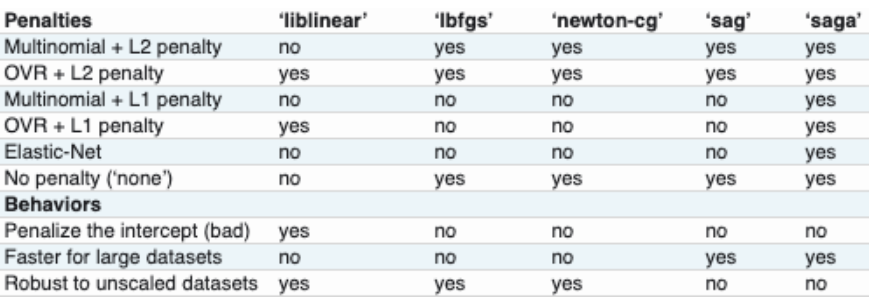




**¿Que Sirve cada uno?**

liblineares rápido con conjuntos de datos pequeños, pero tiene problemas con los puntos de silla y no se puede paralelizar en varios núcleos de procesador. Solo puede usar uno contra el resto para resolver problemas de varias clases. También penaliza la intercepción, lo que no es bueno para la interpretación.

lbfgs evita estos inconvenientes y es relativamente rápido. Es la mejor opción para la mayoría de los casos sin un conjunto de datos realmente grande.


**Parámetros**

La clase Scikit-learn LogisticRegression puede tomar los siguientes argumentos.
penalty` dual` tol` C` fit_intercept` intercept_scaling` class_weight` random_state` solver` max_iter` verbose` warm_start` n_jobs`l1_ratio

No incluiré todos los parámetros a continuación, solo extractos de esos parámetros que probablemente sean valiosos para la mayoría de las personas. Para mas Info consultar el link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Mas info, aqui:

https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451


### Entramiento de IA con AutoSolver

In [ ]:
X = data.drop('si_no', axis=1)
y = data.si_no

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=100000)
rfe = RFE(model, 3, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


Los parametos que se utilizaron para el autoolucionador son:

In [ ]:
rfe.estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

O bien tambien podemos verlos como:

In [ ]:
rfe.get_params

<bound method BaseEstimator.get_params of RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100000,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=3, step=1, verbose=1)>

Los valores que el autosolucionador encontro para trabajar con ellos son:

In [ ]:
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False])

Estos corresponden a los hayados en X, los cuales corresponden como true a las susodichas keys

In [ ]:
X.columns

Index(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados'],
      dtype='object')

In [ ]:
for i in range(len(X.keys())):
  print(X.keys()[i] ,"--->", rfe.support_[i])


edad ---> False
trabajo ---> False
estado_civil  ---> False
educacion ---> False
total_hijos ---> False
credito_sin_pago ---> True
prestamo_vivienda ---> False
prestamo_personal ---> False
valor_prestamo ---> False
dias_ultimo_pago ---> False
tarjetas_credito ---> False
contacto ---> True
mes ---> False
dia_semana ---> False
duracion_ultimo_contacto ---> False
dias_ultimo_contacto ---> False
anterior_contacto ---> True
numero_empleados ---> False


Esto quiere decir que la Propia maquina escogio:

1. credito_sin_pago
2. contacto
3. anterior_contacto

De tener los siguientes datos en X

In [ ]:
X.head(1)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados
0,44,1,1,2,7,1,2,0,268017,0,5,0,8,5,210,43,0,88


Pasamos a tener los siguientes datos aprobados


In [ ]:
XX = X[X.columns[rfe.support_]] ## creamos una nueva variable con la cual solo utilizaremos los datos aprobados por la IA
XX.head(1)

,credito_sin_pago,contacto,anterior_contacto
0,1,0,0


In [ ]:
# Seguimos con el entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=8, stratify=y)

model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

0.8883224083515416